In [1]:
from src.model import PyTradeShifts
from src.postprocessing import Postprocessing
import pandas as pd
import os
os.chdir('../')

In [2]:
print(os.getcwd())

/home/florian/Documents/GitHub/pytradeshifts


In [3]:
LoI_data = pd.read_csv("data/scenario_files/losing_industry/Wheat2mean_values.csv")
LoI_data.head()

,country,mean_value
0,Japan,-16.577032
1,Poland,-51.244724
2,Armenia,-31.690934
3,Jordan,0.000000
4,Moldova,-32.365826


In [14]:
print("The average yield reduction globally is: ", LoI_data["mean_value"].mean())
print("This considers n = ", len(LoI_data), " countries")

The average yield reduction globally is:  -34.79496316270323
This considers n =  94  countries


Loaded data for Wheat in Y2021.
Removed 1 countries with no trade or production.
Prebalanced trade matrix.
Determinant=0 encountered in PyTradeShifts.correct_reexports().
Re-applying PyTradeShifts.remove_net_zero_countries().
Removed 1 countries with no trade or production.
Attempting to invert the matrix again.
Corrected re-exports.
Removed countries with trade below the 75th percentile.
Built trade graph.
Found 7 trade communities.


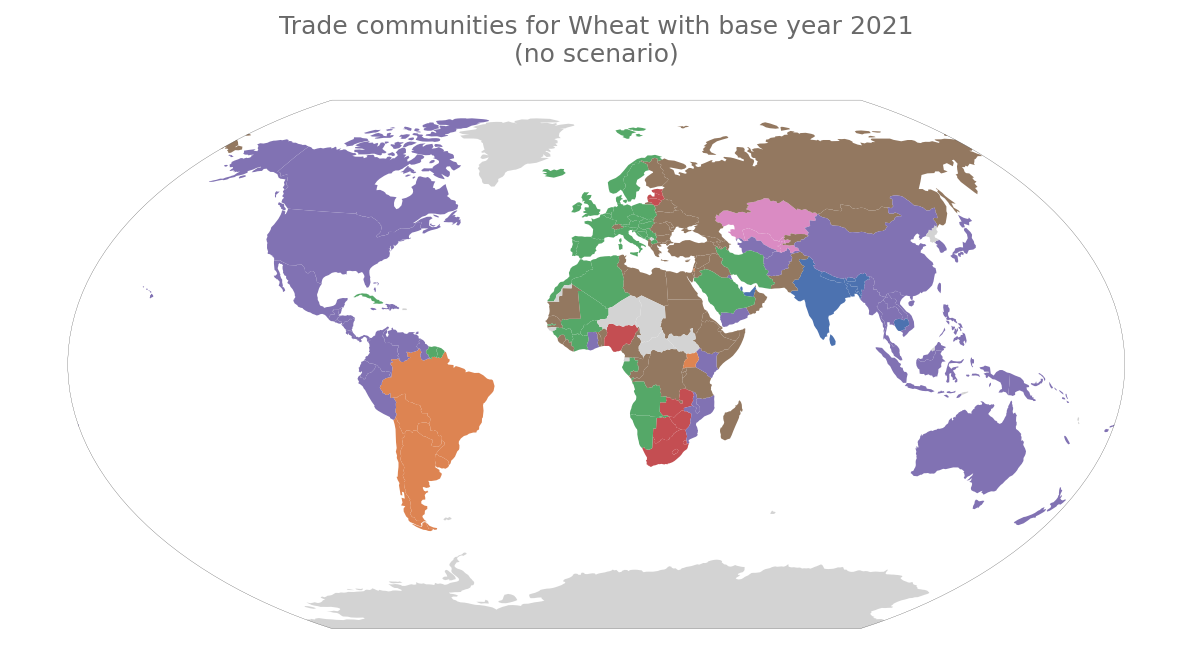

In [4]:
base_wheat = PyTradeShifts(
    "Wheat",
    2021,
    region="Global",
    cd_kwargs={"seed": 2},
    make_plot=True,
)

Loaded data for Wheat in Y2021.
Removed 1 countries with no trade or production.
Prebalanced trade matrix.
Determinant=0 encountered in PyTradeShifts.correct_reexports().
Re-applying PyTradeShifts.remove_net_zero_countries().
Removed 1 countries with no trade or production.
Attempting to invert the matrix again.
Corrected re-exports.
Removed countries with trade below the 75th percentile.
Applied scenario LoI Wheat.
Built trade graph.
Found 6 trade communities.


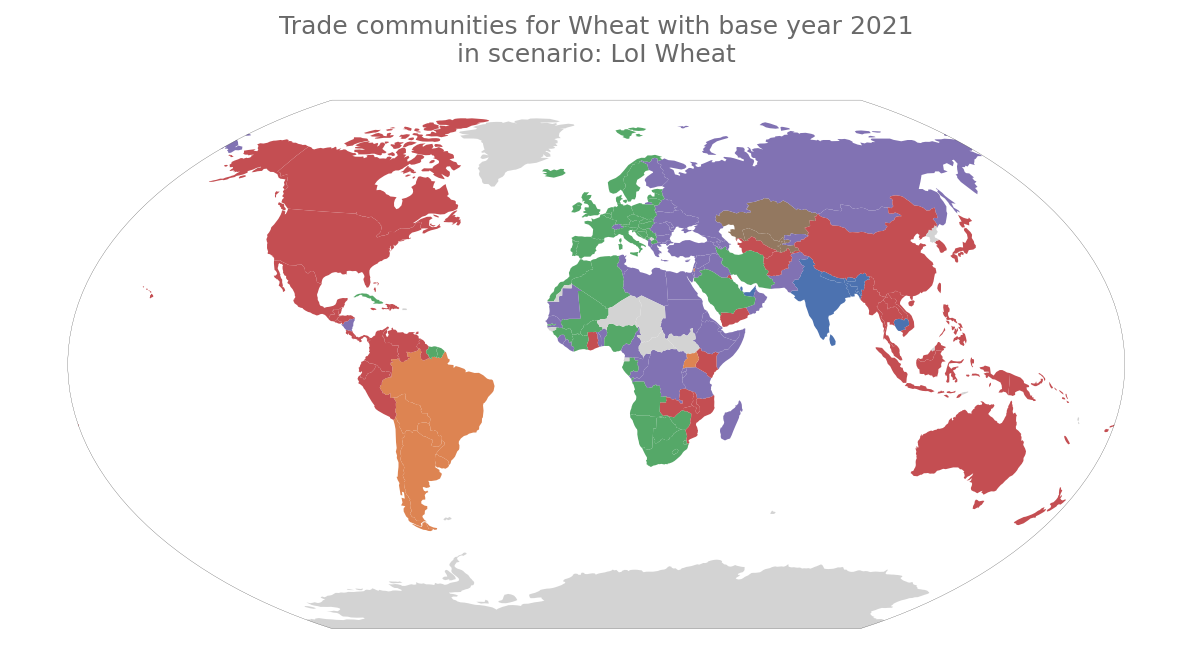

In [5]:
LoI_Wheat = PyTradeShifts(
    crop="Wheat",
    region="Global",
    #with_preprocessing=True,
    base_year=2021,
    scenario_file_name="losing_industry/Wheat2mean_values.csv",
    scenario_name="LoI Wheat",
    cd_kwargs={"seed": 2},
    make_plot=True,
)

In [6]:
comparison = Postprocessing([base_wheat, LoI_Wheat], anchor_countries=["China", "Russia"])

Starting postprocessing computations...


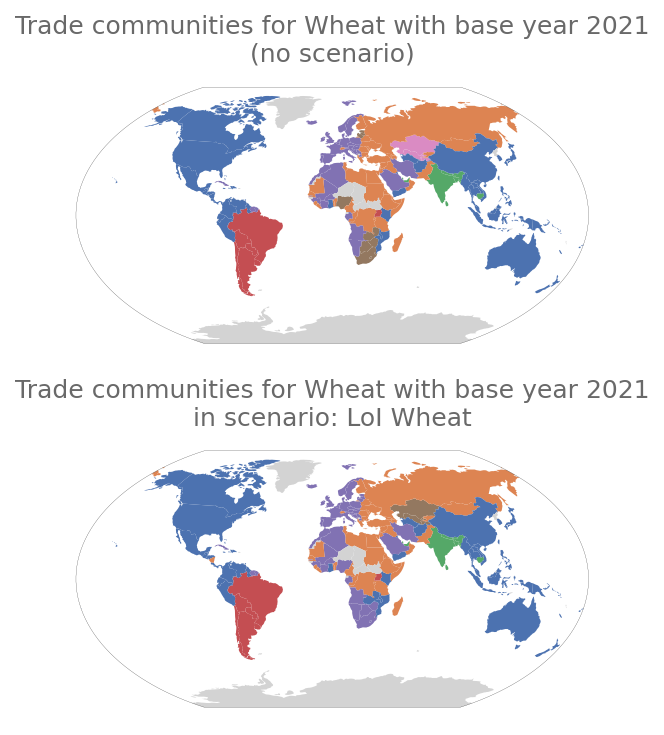

In [7]:
comparison.plot_all_trade_communities()

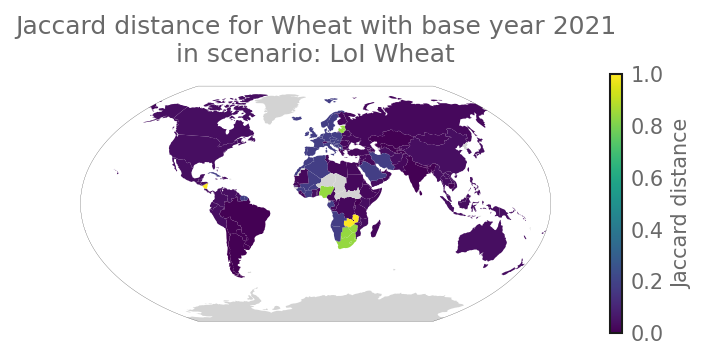

In [8]:
comparison.plot_community_difference()

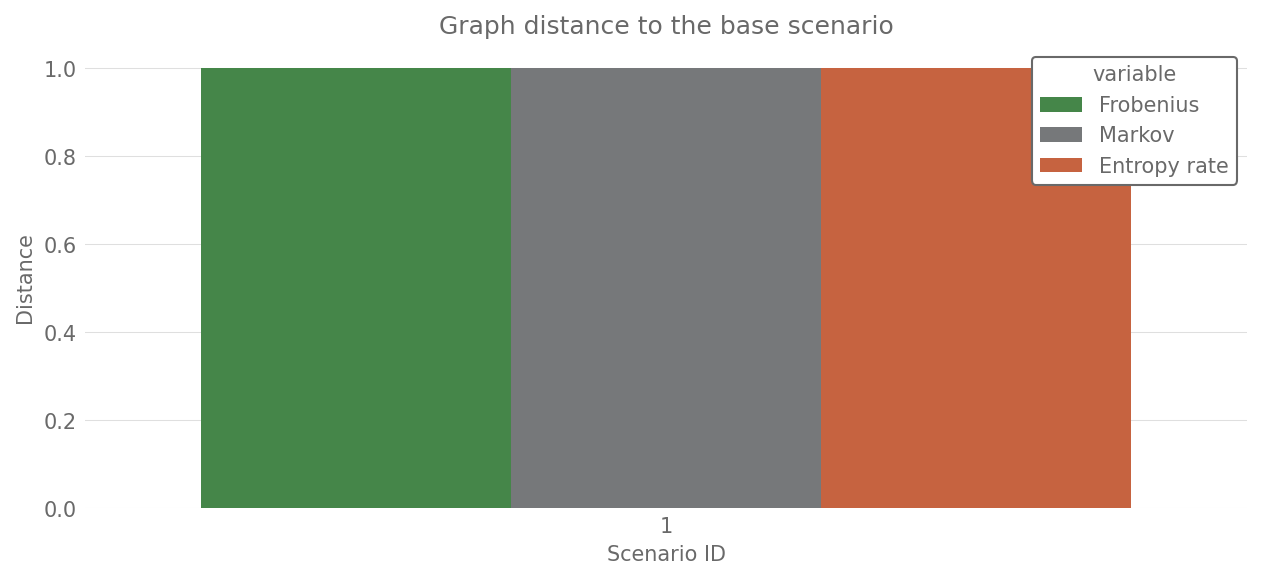

In [9]:
comparison.plot_distance_metrics(frobenius="relative")

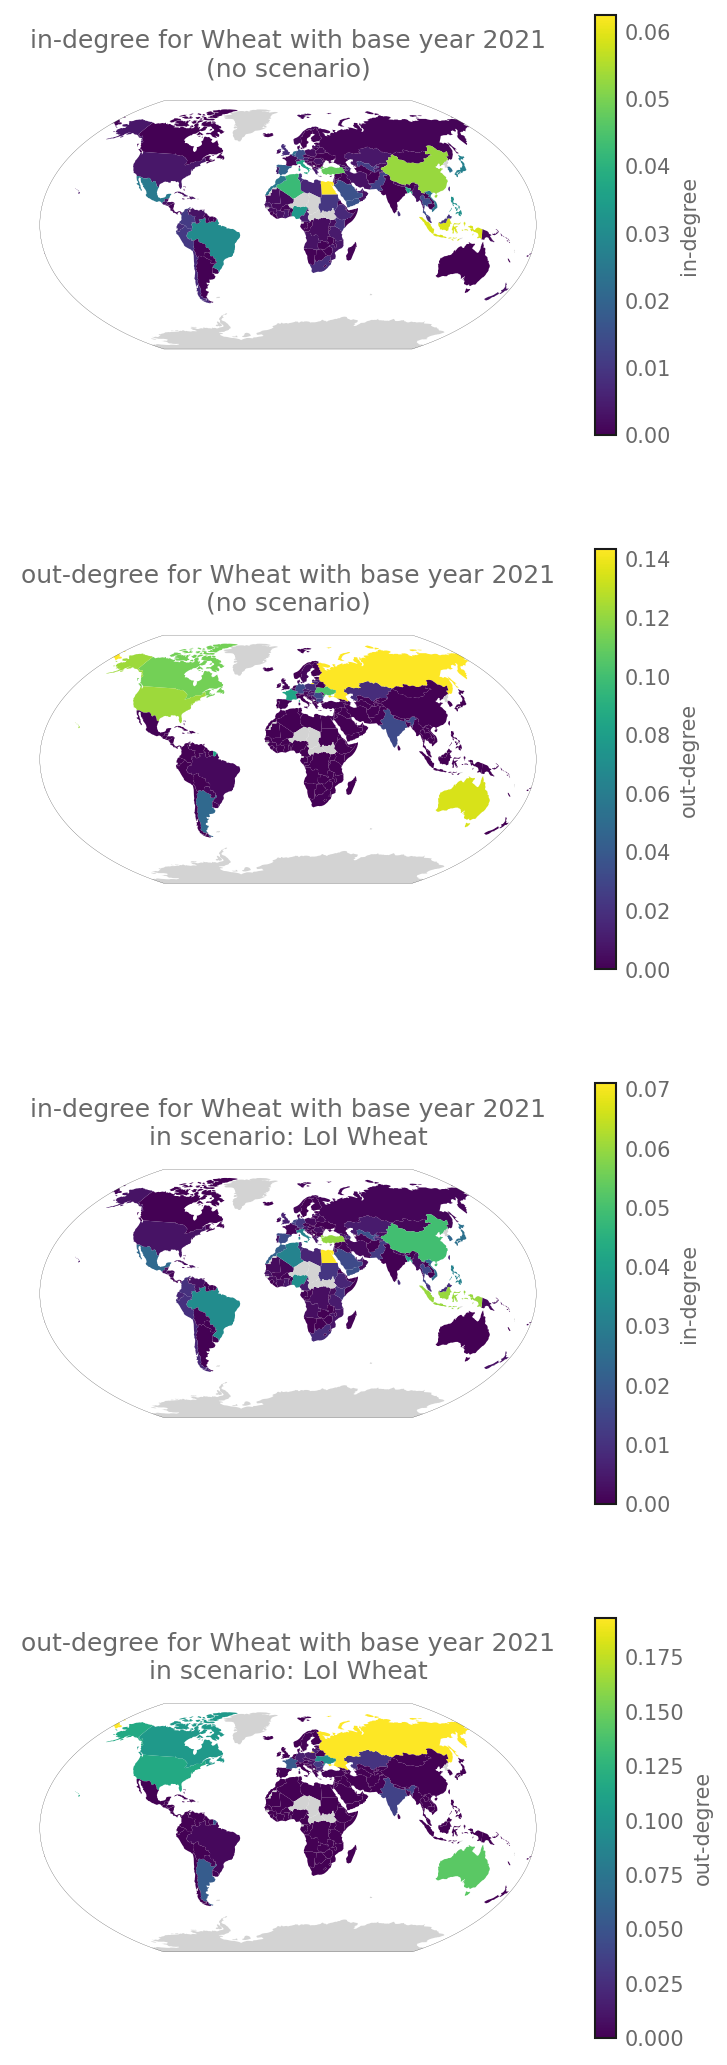

In [10]:
comparison.plot_centrality_maps(figsize=(5, 25), shrink=0.2)

In [11]:
comparison.print_per_community_centrality_metrics(index=False)

***| Degree centrality metrics for the scenario with ID: 0 |***
╒═════════════╤═════════════╤═════════════╤═════════════╤══════════════╤══════════════╤══════════════╤══════════════╕
│ Smallest    │    Smallest │ Largest     │     Largest │ Smallest     │     Smallest │ Largest      │      Largest │
│ in-degree   │   in-degree │ in-degree   │   in-degree │ out-degree   │   out-degree │ out-degree   │   out-degree │
│ country     │       value │ country     │       value │ country      │        value │ country      │        value │
╞═════════════╪═════════════╪═════════════╪═════════════╪══════════════╪══════════════╪══════════════╪══════════════╡
│ Australia   │ 0           │ Indonesia   │   0.0590339 │ Afghanistan  │            0 │ Australia    │    0.134878  │
├─────────────┼─────────────┼─────────────┼─────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│ Moldova     │ 7.79805e-06 │ Egypt       │   0.0624968 │ Albania      │            0 │ Russia       │    0.14